# Thinking about Differential Equations, Autonomous first order ODE (solution annimations, equilibrium points, phase plot,..., just some notes)
### Joseph E. McEwen, (c) 2021, version 0.0.1

This notebook provides code to animate solutions to first order autonomous differential equaitons. All the cool plots are after the code at the bottom of the notebook.

**Required software**
* I recomend you install the [Anaconda distribution of python.](https://www.anaconda.com/products/individual)
* You will also need to install ffmpeg. 

**References**
* Introduction to Differential Equations by Boyce.
* Elementary Differential Equations by Trench, it is free here, https://digitalcommons.trinity.edu/mono/8/. 
* Nonlinear Dynamics and Chaos by Steven H. Strogatz (not the book for your first exposure to differential equaitons, but a lot of fun when you got at least one differential equations class under your belt).
* A website from UIUC, https://faculty.math.illinois.edu/~hirani/cbmg/diffeq.html. 

**Why this notebook**

This notebook has a few purposes. 
* One, these are my notes. If I want to learn something, I know that I need to take a deep dive into the subject. Coding is a good way to do this, by coding you have to learn all the details.
* Two, perhaps this notebook can aid students. In fact, this notebook was inspired by a tutoring session I held for a differential equations class. After the class I took some time to recap the ideas disscussed in the tutoring session. I thought writing up my ideas would help to organize my mind and I could share my thoughts in written form along with some cool animations. 
* Plus, I just like to code. I wrote this notebook with two audiences in mind, me and students. 

**Are animations useful**

I like animations. But, maybe they are not that great of a learning device. Perhaps it is just better to make hand drawn diagrams. This really forces one to use their imagination, which I think is a key ingredient to doing any type of math. 

**If you don't know Python**

Perhaps you don't know python or don't know that much python. That is no problem and awesome. It is no problem because you can just ignore the code and pay attention to the animations and the text. It is awesome because this notebook might make you interested in learning python (and provide you with example code). 

**Python versus Matlab**

You might say, "hey, Joe, you can do this in Matlab and it is much faster!" Yeah, I agree with that. But Python is free and Matlab is expensive. Expensive means that is is exclusive (not everyone can use it). You comprende now? 

**This code is really limited**

Yes, this code is really limited. I may expand it, I may not. Expanding this notebook might depend on if students find it useful - we will see. 

**What could be better**

* I would like if making animations in Python was faster. 
* I would like if Python's streamplot function was nicer. 
* I probably should add some functionality for non-autonomous ODEs. 

In [46]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import latex
from sympy import symbols, Function
from scipy.integrate import solve_ivp

from matplotlib import animation, rc
from IPython.display import HTML, Math

rc('animation', html='jshtml')

In [47]:
# # get dependencies 
# print(np.__version__)
# print(matplotlib.__version__)

# %reload_ext watermark
# print(" ")
# %watermark --iversions

1.19.2
3.3.4
 
matplotlib 3.3.4
sympy      1.7.1
numpy      1.19.2



We will input our differential equation as a function of $y$ and $t$. So far this code only accepts first order differential equations (i.e. only first derivatives). To input a differential equation we input the right hand side function of an equation 
\begin{align} 
\frac{dy}{dt} = f(y,t)~. 
\end{align} 

In [20]:
# sympy symbols for t and y
t,y=symbols("t,y")

In [21]:
class ODETOOLS:
    
    def __init__(self,f,ny,nt,ymin,ymax,tmin,tmax):
        
        '''
        Ordinary differential equation python tool kit. 
        inputs: 
        f is the right handside of the differential equation. f contains sympy symbols t and y and numerical values. 
        ny is the number number of grid points for y between ymin and ymax. 
        nt is the number of grid points for t between tmin and tmax. 
        
        '''
        
        
        if t in f.free_symbols: 
            self.de_type="non-autonomous"
        else: 
            self.de_type="autonomous"
        
        self.f=f
        self.rhs=sym.lambdify((t,y),self.f)
        
        self.ymin=ymin
        self.ymax=ymax
        
        self.tmin=tmin
        self.tmax=tmax
        
        self.nt=nt
        
        # define Y as a function of t to display derivative 
        Y=symbols("y",cls=Function)
        self.lhs=Y(t)
        
        self.eqn=sym.Eq(self.lhs.diff(t),f)
        
        print("Your differential equation is:")
        display(self.eqn)
        
        self.t=np.linspace(tmin,tmax,nt)
        self.y=np.linspace(ymin,ymax)
        
    def streamplot(self,ylabel=None,xlabel=None,density=None,minlength=.2,figsize=(6,6)):
        '''
        Function to make streamplot of differential equations.
        '''
        
        
        T,Y=np.meshgrid(self.t,self.y)
        dtdt=np.ones_like(T)
        dydt=self.rhs(T,Y)
        
        
        fig=plt.figure(figsize=figsize)
        ax=fig.add_subplot(111)
        
        if ylabel is not None:
            ax.set_ylabel(ylabel,size=20)
        
        if xlabel is not None:
            ax.set_xlabel(xlabel,size=20)
        
        ax.streamplot(T,Y,dtdt,dydt,color="k",minlength=minlength)
        ax.grid()
        
    def plot_fy(self,n=200):
        '''
        Plot the an autonomous differenetial equation. 
        '''
        
        if self.de_type=="autonomous":
        
            y_range=np.linspace(self.ymin,self.ymax,n)
            fy=self.rhs(0,y_range)
            
            fig=plt.figure()
            ax=fig.add_subplot(111)
            ax.set_ylabel(r"$dy/dt$", size=20)
            ax.set_xlabel(r"$y$", size=20)
            
            ax.plot(y_range,fy)
            ax.grid()
        else:
            print("This is not an autonmous differential equation, can not plot in one-dimension.")
            

            
    def solve(self,y0, method="RK45"):
        '''
        Function to solve the differential equation numericaly, default method is RK45. 
        '''
        
        n_y=y0.size
        sol_mat=np.zeros((n_y,self.nt))
        t_mat=np.zeros((n_y,self.nt))
        
        
        for i in range(n_y):
            
            sol=solve_ivp(self.rhs,(self.tmin,self.tmax),np.array([y0[i]]),t_eval=self.t, method=method)
            
            y_sol=sol["y"][0,:]
            
            # if the returned solution is not the same size as nt
            # then fill will values that go off the grid
            # this probably happens if the solution diverges 
            if y_sol.size < self.nt:
                
                y_sol=np.r_[y_sol, np.ones(self.nt-y_sol.size)*self.ymin*1000]
            
            
            sol_mat[i,:]=y_sol
            t_mat[i,:]=self.t
            
        return t_mat, sol_mat
        
        
    def animate_de(self,y01,y02=None,ylabel=None,xlabel=None,minlength=.2,method="RK45"):
        '''
        Function to animate the evolution of a set of solutions and
        to animate the phase plot. 
        
        y01 are a set of initial values.
        y02 are another (optional) set of initial values that you would like to distinguish from y01 (perhaps fixed points).
        '''
        
        N_frames=self.t.size
        
        # convert to numpy array if entered as a list 
        y01=np.asarray(y01)
        if y02 is not None: 
            y02=np.asarray(y02)
        
        T,Y=np.meshgrid(self.t,self.y)
        dtdt=np.ones_like(T)
        dydt=self.rhs(T,Y)
        
        t_mat1, sol1=self.solve(y01, method=method)
        
        if y02 is not None: 
            t_mat2, sol2=self.solve(y02, method=method)
        
        
        fig=plt.figure(figsize=(14,8))
        ax=fig.add_subplot(121)
        ax.set_title("solution evolution animation",size=20)
        ax.grid()
        
        if ylabel is not None:
            ax.set_ylabel(ylabel,size=20)
        
        if xlabel is not None:
            ax.set_xlabel(xlabel,size=20)
        
        ax.set_xlim(self.tmin,self.tmax)
        ax.set_ylim(self.ymin,self.ymax)

        ax.streamplot(T,Y,dtdt,dydt,color="blue",minlength=minlength)

        pts1,=ax.plot([],[],'o',color="black",ms=10,alpha=.8)
        
        if y02 is not None: 
            pts2,=ax.plot([],[],'o',color="red",ms=10)
        
        
        # second plot
        ax=fig.add_subplot(122)
        ax.set_title("phase plot", size=20)

        DT=self.tmax-self.tmin
        eps=DT/20
        
        ax.set_xlim(self.tmin-eps,self.tmin+eps)
        ax.set_ylim(self.ymin,self.ymax)
        ax.axes.get_xaxis().set_visible(False)
        
        ax.axvline(self.tmin,alpha=.7)
        
        ppts1,=ax.plot([],[],'o',color="black",ms=10,alpha=.8)
        if y02 is not None: 
            ppts2,=ax.plot([],[],'o',color="red",ms=10,alpha=.8)

        plt.close()

        def init():
            pts1.set_data([], [])
            ppts1.set_data([], [])
            
            if y02 is not None: 
                pts2.set_data([], [])
                ppts2.set_data([], [])
                return (pts1,ppts1,pts2,ppts2,)
            else: 
                return (pts1,ppts1,)
           

        def animate(i):
            pts1.set_data(t_mat1[:,i], sol1[:,i])
            ppts1.set_data(t_mat1[:,0], sol1[:,i])
            
            if y02 is not None: 
                
                pts2.set_data(t_mat2[:,i], sol2[:,i])
                ppts2.set_data(t_mat2[:,0], sol2[:,i])
                return (pts1,ppts1,pts2,ppts2,)
        
            else: 
                return (pts1,ppts1,)
            

        anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N_frames, interval=100, 
                               blit=True)
        
        return anim

### Example 1
We want to analyze the differential equation 
\begin{align} 
\frac{dy}{dt} = .5 y - 450~. 
\end{align} 
This ODE is taken from Boyce, chapter 1 equation 7, which models the growth of field mice. 

Below is the code to input the example ODE. 

Your differential equation is:


Eq(Derivative(y(t), t), 0.5*y - 450)

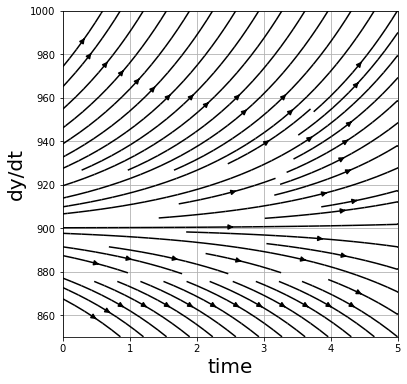

In [22]:
# right hand side function 
f=.5*y-450


n=30      # number of y-points
nt=2*n    # number or t-points
ymin=850  # minimum y for plot
ymax=1000 # maximum y for plot
tmin=0    # minimum time
tmax=5    # maximum time 



ode1=ODETOOLS(f,n,nt,ymin,ymax,tmin,tmax)

# display streamplot
ode1.streamplot(ylabel="dy/dt", xlabel="time")

In [24]:
# check type, plot trajectories of various points, examine phase plot 

print("Type of ODE:", ode1.de_type)
ode1.solve(np.array([900,920,890,870,930]))
y02=[900]
y01=[920,890,870,930]
anim=ode1.animate_de(y01,y02,ylabel="number of mice",xlabel="time")
anim.save("mice_owl_solution.mp4")

HTML(anim.to_html5_video())

Type of ODE: autonomous


### Example 2
A secnd example is [logistic equation](https://mathworld.wolfram.com/LogisticEquation.html) (see chapter 2.5 in Boyce)
\begin{align} 
\frac{dy}{dt} = r(1-y/K) y~, 
\end{align} 
where $r$ and $K$ are parameters of the differential equation, the intrinsic growth rate and saturation level, respectivley. 

Your differential equation is:


Eq(Derivative(y(t), t), y*(1 - y))

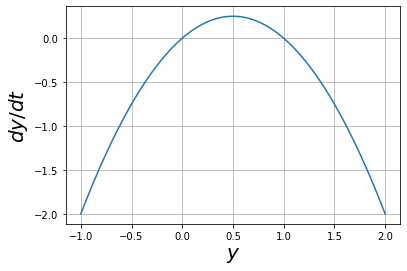

In [15]:
#parameters 
r=1
K=1
f=r*(1-y/K)*y


n=30
nt=2*n
ymin=-1
ymax=2
tmin=0
tmax=5


ode2=ODETOOLS(f,n,nt,ymin,ymax,tmin,tmax)
ode2.plot_fy()

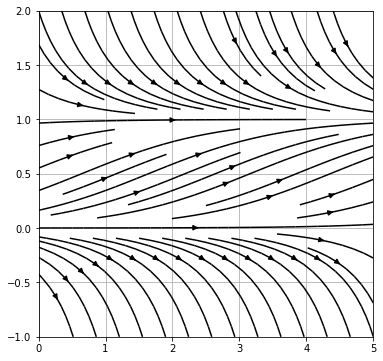

In [16]:
ode2.streamplot()

In [17]:
anim=ode2.animate_de([1/2,1.5, 1.1, .1, -.1],[0,1])
HTML(anim.to_html5_video())

In the above animation there are two types of fixed points (the red dots). One is stable fixed point, while the other is an unstable fixed point. 

In [25]:
# save animaion 
anim.save("logistic_solution.mp4")

 
2021-09-21T09:48:33-07:00

CPython 3.8.5
IPython 7.22.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 20.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
